In [3]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [4]:
x = [1, 2, 3, 4, 5, 8, 13, 15]
y = [0, 5, 2, 1, 4, 4, 6, 8]

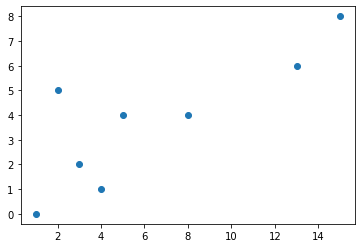

In [5]:
plt.scatter(x ,y)

# <ins>**Avec 2 points (matrice)**</ins>

In [6]:
A = [1, x[0]], [1, x[1]]
b = [y[0], y[1]]

In [7]:
[a0, a1] = linalg.solve(A, b)

In [8]:
def P1(x):
    return a0 + a1 * x

In [9]:
Vx = np.linspace(min(x), max(x), 51)

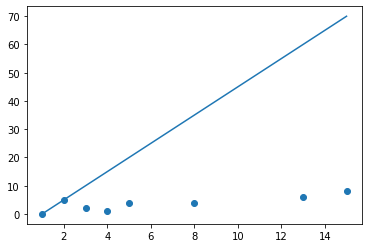

In [10]:
plt.plot(Vx, P1(Vx))
plt.scatter(x, y)
plt.show()

# <ins>**Avec 3 points (matrice)**</ins>

In [11]:
A = [1, x[0], x[0]**2], [1, x[1], x[1]**2], [1, x[2], x[2]**2]
b = [y[0], y[1], y[2]]

In [12]:
[a0, a1, a2] = linalg.solve(A, b)

In [13]:
def P2(x):
    return a0 + a1 * x + a2 * x**2

In [14]:
Vx = np.linspace(min(x), max(x), 50)

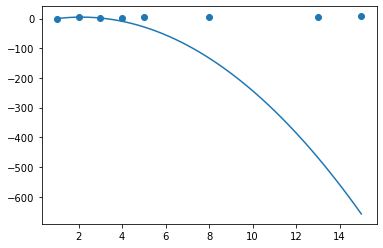

In [15]:
plt.plot(Vx, P2(Vx))
plt.scatter(x , y)
plt.show()

# <ins>**Avec N points (matrice)**</ins>

In [16]:
ordre = len(x)
A = [[i**j for j in range(ordre)] for i in x]
print(A)

[[1, 1, 1, 1, 1, 1, 1, 1], [1, 2, 4, 8, 16, 32, 64, 128], [1, 3, 9, 27, 81, 243, 729, 2187], [1, 4, 16, 64, 256, 1024, 4096, 16384], [1, 5, 25, 125, 625, 3125, 15625, 78125], [1, 8, 64, 512, 4096, 32768, 262144, 2097152], [1, 13, 169, 2197, 28561, 371293, 4826809, 62748517], [1, 15, 225, 3375, 50625, 759375, 11390625, 170859375]]


In [17]:
b = y
print(b)

[0, 5, 2, 1, 4, 4, 6, 8]


In [18]:
sol = linalg.solve(A, b)

In [19]:
def Pn(x):
    res = []
    for x in x:
        el = 0
        for i in range(ordre):
            el += sol[i] * x**i
        res.append(el)
        
    return res

# autre solution
# return np.sum([Sol[i]*x**i for i in range(n)])

In [20]:
Vx = np.linspace(min(x), max(x), 500)

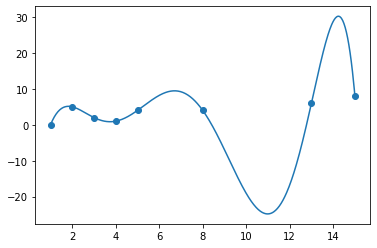

In [21]:
plt.plot(Vx, Pn(Vx))
# si autre solution : plt.plot(Vx, [P(x) for x in Vx])
plt.scatter(x , y)
plt.show()

# <ins>**Avec 3 points (La Grange)**</ins>

In [29]:
x0, y0 = 2, 2
x1, y1 = 3, 4
x2, y2 = 5, 4

In [30]:
def P2(x):
    a2 = y2 * (((x-x0)*(x-x1)) / ((x2-x0)*(x2-x1)))
    a1 = y1 * (((x-x0)*(x-x2)) / ((x1-x0)*(x1-x2)))
    a0 = y0 * (((x-x1)*(x-x2)) / ((x0-x1)*(x0-x2)))
    return a2 + a1 + a0

In [31]:
Vx = np.linspace(-10, 10, 50)
Vy = [P2(x) for x in Vx]

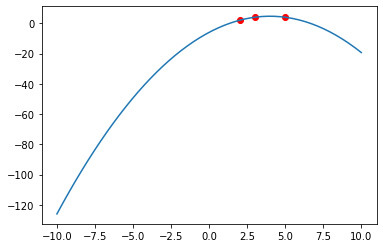

In [32]:
plt.plot(Vx, Vy)
plt.scatter([x0, x1, x2], [y0, y1, y2], c='red')
plt.show()

# <ins>**Avec N points (La Grange)**</ins>

In [70]:
Xi = [1, 2, 3, 4, 5, 8, 13, 15]
Yi = [0, 5, 2, 1, 4, 4, 6, 8]

n = len(Xi)

In [71]:
def Li(x, i):
    res = 1
    for j in range(n):
        if (i != j):
            res *= (x-Xi[j])/(Xi[i]-Xi[j])
    return res
def Qn(x):
    res = 0
    for i in range(n):
        res += Yi[i]*Li(x, i)
    return res

In [72]:
Vx = np.linspace(min(Xi), max(Xi), 100)

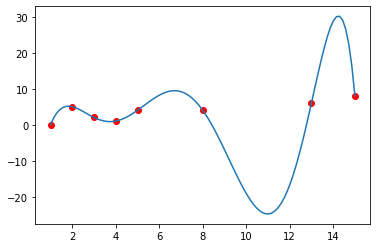

In [73]:
plt.plot(Vx, Qn(Vx))
plt.scatter(Xi, Yi, c='red')
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve
from scipy.sparse.linalg import spsolve

In [78]:
Nb=5
print(np.eye(Nb,k=-1)-2*np.eye(Nb)+np.eye(Nb,k=1))

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]
